data.csv
Провести предварительный анализ данных (могут быть пропущенные значения и ошибки в данных).
Создать модели для прогнозирования цены (kNN, decision tree, linear regression) и сравнить показатели.
Произвести анализ остатков наилучшей модели.

Пожалуйста, пишите больше комментариев с выводами!

Отчет сдать в папку "Работы 22.11"

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('data.csv')
data.head(20)

,Area,NumberOfRooms,Zip,price,latitude,longitude
0,44.0,2.0,1057,225000,52.367071,4.853112
1,298.0,6.0,1081,2298000,52.333770,4.852240
2,141.0,5.0,1027,750000,52.411901,4.962458
3,371.0,5.0,1018,1750000,52.368387,4.918091
4,168.0,6.0,1060,490000,40.804673,-73.963420
5,82.0,3.0,1064,230000,52.372459,4.819220
6,66.0,3.0,1057,349000,52.367071,4.853112
7,82.0,3.0,1055,345000,52.381707,4.854023
8,75.0,3.0,1015,450000,52.379093,4.885109
9,85.0,3.0,1087,295000,52.355590,5.000561


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2191 non-null   float64
 1   NumberOfRooms  2163 non-null   float64
 2   Zip            2191 non-null   int64  
 3   price          2191 non-null   object 
 4   latitude       2191 non-null   float64
 5   longitude      2191 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 102.8+ KB


Заметно, что присутствуют пропущенные данные. Для начала отформатируем названия столбцов

In [4]:
data = data.rename(columns={'Area' : 'area', 'NumberOfRooms' : 'number_of_rooms', 'Zip' : 'zip'})
data

,area,number_of_rooms,zip,price,latitude,longitude
0,44.0,2.0,1057,225000,52.367071,4.853112
1,298.0,6.0,1081,2298000,52.333770,4.852240
2,141.0,5.0,1027,750000,52.411901,4.962458
3,371.0,5.0,1018,1750000,52.368387,4.918091
4,168.0,6.0,1060,490000,40.804673,-73.963420
...,...,...,...,...,...,...
2186,207.0,5.0,1015,1290000,52.379093,4.885109
2187,105.0,4.0,1067,330000,52.376579,4.783460
2188,115.0,4.0,1054,849000,52.361233,4.865359
2189,136.0,4.0,1075,1250000,52.351564,4.856651


В столбце price имеется засоренное значение. За счет этого он имеет тип 'object'.
Принято решение удалить подобные объекты из выборки.

In [5]:
data = data.loc[data['price'] != 'Prijs op aanvraag']
data['price'] = data['price'].astype(float)

C:\Users\User\AppData\Local\Temp\ipykernel_14412\3391004271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(float)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2182 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             2182 non-null   float64
 1   number_of_rooms  2154 non-null   float64
 2   zip              2182 non-null   int64  
 3   price            2182 non-null   float64
 4   latitude         2182 non-null   float64
 5   longitude        2182 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 119.3 KB


Удалим пропущенные значения из выборки

In [7]:
data = data.loc[data['number_of_rooms'].isna() == False]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             2154 non-null   float64
 1   number_of_rooms  2154 non-null   float64
 2   zip              2154 non-null   int64  
 3   price            2154 non-null   float64
 4   latitude         2154 non-null   float64
 5   longitude        2154 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 117.8 KB


In [9]:
data.isna().sum()

area               0
number_of_rooms    0
zip                0
price              0
latitude           0
longitude          0
dtype: int64

Разделим выборку на обучающую и тестовую

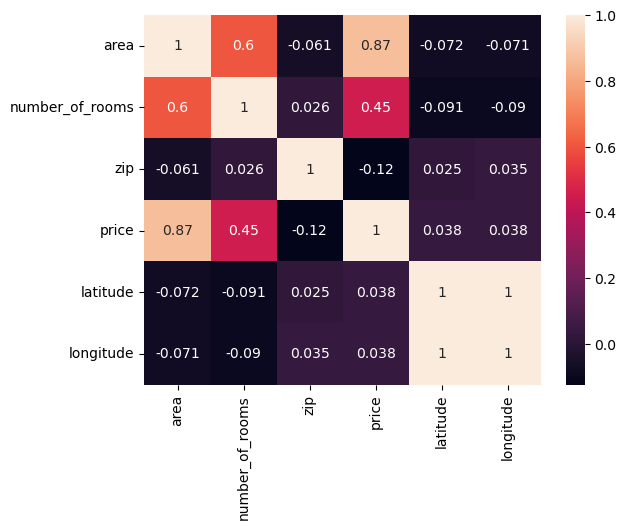

In [10]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True)
None

In [11]:
y = data['price']
X = data[['area', 'number_of_rooms', 'zip', 'latitude', 'longitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Сама по себе задача предсказывания цены является задачей регрессии. Но попробуем применить классификаторы, раз этого требует условие.

## kNN

С помощью gridsearchcv подберем лучшие параметры для модели, изменяя метрику и число соседей.

In [49]:
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
}
knn = KNeighborsRegressor()
knn_grid = GridSearchCV(estimator=knn, 
                        param_grid=param_grid, 
                        n_jobs=-1,
                        verbose=1,
                        cv=5)
knn_grid.fit(X_train_normalized, y_train)
knn_grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'metric': 'minkowski', 'n_neighbors': 10}

In [50]:
knn_grid_predictions = knn_grid.predict(X_test_scaled)
r2_score(y_test.to_numpy(), knn_grid_predictions)

0.7785818799012514

## DecisionTree

Аналогично подберем лучшие параметры, меняя лоссс и максимальную глубину дерева.

In [61]:
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [1, 5, 10, 15, 20, 30, 50, 80],
}
dtr = DecisionTreeRegressor(random_state=42)
dtr_grid = GridSearchCV(estimator=dtr, 
                        param_grid=param_grid, 
                        n_jobs=-1,
                        verbose=1,
                        cv=5)
dtr_grid.fit(X_train_scaled, y_train)
dtr_grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'criterion': 'squared_error', 'max_depth': 10}

In [62]:
dtr_grid_predictions = dtr_grid.predict(X_test_scaled)
r2_score(y_test, dtr_grid_predictions)

0.6067755809357986

## RandomForest

In [65]:
param_grid = {
    'n_estimators': [2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 50, 100],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [1, 5, 10, 15, 20, 30, 50, 80],
}
rfr = RandomForestRegressor(random_state=42)
rfr_grid = GridSearchCV(estimator=rfr, 
                        param_grid=param_grid, 
                        n_jobs=-1,
                        verbose=1,
                        cv=5)
rfr_grid.fit(X_train_scaled, y_train)
rfr_grid.best_params_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


{'criterion': 'absolute_error', 'max_depth': 30, 'n_estimators': 50}

In [66]:
rfr_grid_predictions = rfr_grid.predict(X_test_scaled)
r2_score(y_test, rfr_grid_predictions)

0.7214032553875623

## Ridge

In [92]:
param_grid = {
    'alpha': [1e-2, 1e-3, 1e-4, 1e-5, 1e-10, 1e-13, 1e-19, 1e-20]
}
ridge = Ridge(alpha=1e-13, random_state=42)
ridge_grid = GridSearchCV(estimator=ridge, 
                        param_grid=param_grid, 
                        n_jobs=-1,
                        verbose=1,
                        cv=5)
ridge_grid.fit(X_train_scaled, y_train)
ridge_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'alpha': 1e-13}

In [93]:
ridge_grid_predictions = ridge_grid.predict(X_test_scaled)
r2_score(y_test, ridge_grid_predictions)

0.6984735889935163

## Lasso

In [102]:
param_grid = {
    'alpha': [1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-10, 1e-13, 1e-19, 1e-20]
}
lasso = Lasso(random_state=42)
lasso_grid = GridSearchCV(estimator=lasso, 
                        param_grid=param_grid, 
                        n_jobs=-1,
                        verbose=1,
                        cv=5)
lasso_grid.fit(X_train_scaled, y_train)
lasso_grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.574e+13, tolerance: 6.895e+10
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1e-10}

In [103]:
lasso_grid_predictions = lasso_grid.predict(X_test_scaled)
r2_score(y_test, lasso_grid_predictions)

0.6977825340451558

## GradientBoosting

In [28]:
param_grid = {
    'n_estimators': [20, 30, 35, 40],
    'loss': ['squared_error'],
    'max_depth': [5, 6, 7, 8],
}
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(estimator=gb, 
                        param_grid=param_grid, 
                        n_jobs=-1,
                        verbose=1,
                        cv=5)
gb_grid.fit(X_train_scaled, y_train)
gb_grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'loss': 'squared_error', 'max_depth': 5, 'n_estimators': 40}

In [27]:
gb_grid_predictions = gb_grid.predict(X_test_scaled)
r2_score(y_test, gb_grid_predictions)

0.6554686461747261

## LinReg

Построим матрицу корреляции для отыскания мультиколлинеарных признаков.

У нас есть сильная зависимость между zip и latitude

In [184]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1472.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:17:48   Log-Likelihood:                -29412.
No. Observations:                2099   AIC:                         5.884e+04
Df Residuals:                    2093   BIC:                         5.887e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.193e+08   2.26e+07      5.289      0.000     7.5e+07    1.63e+08
area             8307.9565    116.982     71.019      0.000    8078.543    8537.369
number_of_rooms   -3.9e+04   5188.709     -7.517      0.000   -4.92e+04   -2.88e+04
zip             -2512.2970    328.154     -7.656      0.000   -3155.840   -1868.754
latitude        -2.179e+06   4.24e+05     -5.139      0.000   -3.01e+06   -1.35e+06
longitude       -5.378e+05   1.32e+05     -4.062      0.000   -7.97e+05   -2.78e+05
==============================================================================
Omnibus:                     1389.578   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68035.565
Skew:                           2.490   Prob(JB):                         0.00
Kurtosis:                      30.443   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Удалим признак latitude и перестроим модель, разбив выборку н обучающую и тестовую

In [185]:
y = data.price
X = data[['area', 'number_of_rooms', 'zip', 'longitude']]
data = data[['area', 'number_of_rooms', 'zip', 'price', 'longitude']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

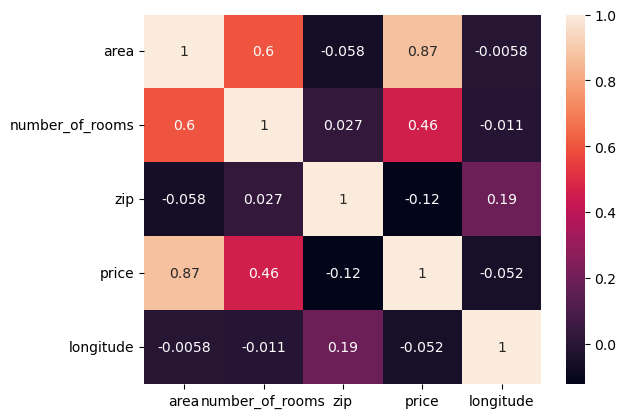

In [186]:
sns.heatmap(data.corr(), annot = True)
None

Из матрицы корреляции видно, что у нас больше нет мультиколлинерных признаков. Построим модель регрессии

In [201]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1279.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:19:44   Log-Likelihood:                -19584.
No. Observations:                1406   AIC:                         3.918e+04
Df Residuals:                    1401   BIC:                         3.920e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.564e+06   7.27e+05      4.904      0.000    2.14e+06    4.99e+06
area             8281.7232    139.821     59.231      0.000    8007.442    8556.004
number_of_rooms -3.907e+04   5923.208     -6.596      0.000   -5.07e+04   -2.75e+04
zip             -1387.5595    252.427     -5.497      0.000   -1882.736    -892.383
longitude       -4.583e+05   1.49e+05     -3.072      0.002   -7.51e+05   -1.66e+05
==============================================================================
Omnibus:                      731.191   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20937.736
Skew:                           1.842   Prob(JB):                         0.00
Kurtosis:                      21.543   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
X_test = sm.add_constant(X_test)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
residuals = y_test - y_pred

Оценим результат с помощью коэффициента детерминации. Его значение достаточно хорошее

In [220]:
from sklearn.metrics import mean_squared_error, r2_score
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.76


Построим распределение остатков. Исследуем их на нормальность и независимость от предсказанных значений

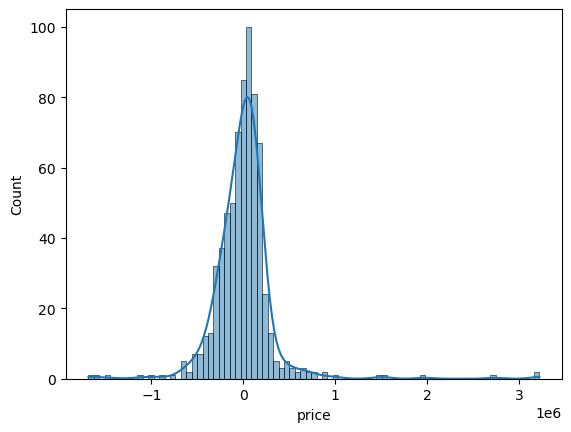

In [205]:
sns.histplot(data=residuals, kde=True)
None

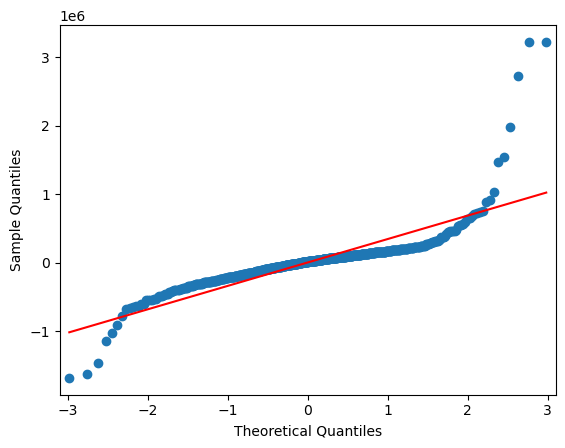

In [207]:
import matplotlib.pyplot as plt
fig = sm.qqplot(residuals, line='s')
plt.show()

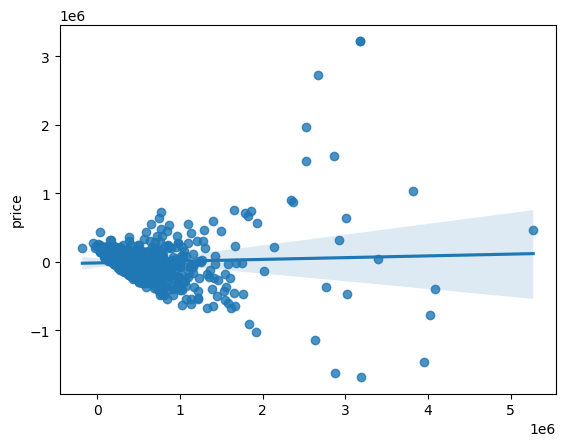

In [210]:
sns.regplot(
    x=y_pred, 
    y=residuals)
None

Как можно видеть, остатки распределены вполне нормально и сильно разбросаны относительно предсказанных значений